# INF8225 TP1 H23 (v1.1)

Paulo Victor - Correia / Matricule 2167525

Partie 3 réalisée: [seul(e)] 

Date limite : 8h30 le 27 février 2023

Remettez votre fichier Colab sur Moodle en 2 formats: **.pdf** ET **.ipynb**

**Comment utiliser**:

Il faut copier ce notebook dans vos dossiers pour avoir une version que vous pouvez modifier, voici deux façons de le faire:
* File / Save a copy in Drive ...
* File / Download .ipynb

**Pour utiliser un GPU**

Runtime / Change Runtime Type / Hardware Accelerator / GPU

# Partie 1 (10 points)



## Objectif
L’objectif de la Partie 1 du travail pratique est de permettre à l’étudiant de se familiariser avec les réseaux Bayésiens et la librairie Numpy.

## Problème


<img src="https://drive.google.com/uc?id=1UhYF6_QGTHGpR5VBg-RKvr8jJWJPN12A" alt="bayes_net" width="600"/>


Voici les tables de probabilités conditionnelles fournies:

* La probabilité qu'il est Nuageux: $Pr(N=1)=0.2$
* La probabilité que l'arroseur a été utilisé sachant qu'il est nuageux ou non: $Pr(A=1|N=1)=0.01$, $Pr(A=1|N=0)=0.3$ 
* La probabilité qu'il ait plu, étant donné que le temps est nuageux: $Pr(P=1|N=1)=0.8$, $Pr(P=1|N=0)=0.1$
* La probabilité que le gazon de Watson soit mouillé...
  * ... sachant qu'il a plu est $Pr(W=1|P=1)=1$
  *... sachant qu'il n'a $\textbf{pas}$ plu: $Pr(W=1|P=0)=0.2$
* La probabilité que Holmes remarque que son gazon est mouillé...
  * ... sachant que l’arroseur a fonctionné et qu'il n'a $\textbf{pas}$ plu: $Pr(H=1|P=0, A=1)=0.9$
  * ... sachant que l’arroseur n'a $\textbf{pas}$ fonctionné et qu'il n'a $\textbf{pas}$ plu: $Pr(H=1|P=0, A=0) = 0$
  * ... sachant qu'il a plu, et que l'arroseur ait ou pas fonctionné: $Pr(H=1|P=1, A={0,1})=1$

## Trucs et astuces
Nous utiliserons des vecteurs multidimensionnels `5d-arrays` dont les `axes` représentent:
```
axe 0 : temps nuageux (N)
axe 1 : pluie (P)
axe 2 : arroseur (A)
axe 3 : gazon de watson (W)
axe 4 : gazon de holmes (H)
```
Chaque `axe` serait de dimension `2`:
```
0 : faux
1 : vrai
```
Quelques point à garder en tête:
- Utiliser la jointe comme point de départ pour vos calculs (ne pas développer tous les termes à la main).
- Attention à l'effet du do-operator sur le graphe.
- L'argument "keepdims=True" de "np.sum()" vous permet conserver les mêmes indices.
- Pour un rappel sur les probabilités conditionelles, voir: https://www.probabilitycourse.com/chapter1/1_4_0_conditional_probability.php

## 1. Complétez les tables de probabilités ci-dessous

In [ ]:
import numpy as np

# Les tableaux sont bâtis avec les dimensions (N, P, A, W, H)
# et chaque dimension est (False, True)

Pr_N = np.array([0.8, 0.2]).reshape(2, 1, 1, 1, 1)
Pr_P_given_N = np.array([[0.9, 0.1], [0.6, 0.4]]).reshape(2, 2, 1, 1, 1)
Pr_A_given_N =  np.array([[0.7, 0.3], [0.99, 0.01]]).reshape(2, 1, 2, 1, 1)
Pr_W_given_P = np.array([[0.8, 0.2], [0.0, 1.0]]).reshape(1, 2, 1, 2, 1)
Pr_H_given_PA = np.array([[1.0, 0.0], [0.1, 0.9], [0.0, 1.0],[0.0, 1.0]]).reshape(1, 2, 2, 1, 2)




print (f"Pr(N)=\n{np.squeeze(Pr_N)}\n")
print (f"Pr(P|N)=\n{np.squeeze(Pr_P_given_N)}\n")
print (f"Pr(A|N)=\n{np.squeeze(Pr_A_given_N)}\n")
print (f"Pr(W|P)=\n{np.squeeze(Pr_W_given_P)}\n")
print (f"Pr(H|P,A)=\n{np.squeeze(Pr_H_given_PA)}\n")

Pr(N)=
[0.8 0.2]

Pr(P|N)=
[[0.9 0.1]
 [0.6 0.4]]

Pr(A|N)=
[[0.7  0.3 ]
 [0.99 0.01]]

Pr(W|P)=
[[0.8 0.2]
 [0.  1. ]]

Pr(H|P,A)=
[[[1.  0. ]
  [0.1 0.9]]

 [[0.  1. ]
  [0.  1. ]]]



## 2. À l'aide de ces tables de probabilité conditionnelles, calculez les requêtes ci-dessous. Dans les cas où l'on compare un calcul non interventionnel à un calcul interventionnel, commentez sur l'interprétation physique des deux situations et les résultats obtenus à partir de vos modèles.

In [ ]:
conjoint_all_prob = Pr_N * Pr_P_given_N * Pr_A_given_N * Pr_W_given_P * Pr_H_given_PA
print(f"Shape of conjoint: {conjoint_all_prob.shape}")
print(f"conjoint probabilities: {conjoint_all_prob}")
print(f"conjoint probabilities sum: {conjoint_all_prob.sum()}")

Shape of conjoint: (2, 2, 2, 2, 2)
conjoint probabilities: [[[[[4.0320e-01 0.0000e+00]
    [1.0080e-01 0.0000e+00]]

   [[1.7280e-02 1.5552e-01]
    [4.3200e-03 3.8880e-02]]]


  [[[0.0000e+00 0.0000e+00]
    [0.0000e+00 5.6000e-02]]

   [[0.0000e+00 0.0000e+00]
    [0.0000e+00 2.4000e-02]]]]



 [[[[9.5040e-02 0.0000e+00]
    [2.3760e-02 0.0000e+00]]

   [[9.6000e-05 8.6400e-04]
    [2.4000e-05 2.1600e-04]]]


  [[[0.0000e+00 0.0000e+00]
    [0.0000e+00 7.9200e-02]]

   [[0.0000e+00 0.0000e+00]
    [0.0000e+00 8.0000e-04]]]]]
conjoint probabilities sum: 1.0


a) $Pr(H=1)$

$$
Pr(H=1) = \sum_{n \in N} \sum_{p \in P} \sum_{a \in A} \sum_{w \in W} = Pr(N=n, P=p, A=a, W=w, H=1)
$$

In [ ]:
p_H = conjoint_all_prob.sum(axis=(0, 1, 2, 3))
answer = p_H[1]
print(f"Pr(H=1)={answer:.5f}")

Pr(H=1)=0.35548


b) $Pr(H=1|A=1)$

$$
Pr(H=1|A=1) = \frac{Pr(H=1, A=1)}{Pr(A=1)}
$$


In [ ]:
conjoint_H_A = conjoint_all_prob[:, :, 1, :, 1].sum()
Pr_A = conjoint_all_prob.sum(axis=(0, 1, 3, 4))
answer = conjoint_H_A / Pr_A[1] # TODO
print(f"Pr(H=1|A=1)={answer:.5f}")

Pr(H=1|A=1)=0.91025


c) $Pr(H=1|do(A=1))$

Given that we intervened on the system, $Pr(H=1|do(A=1)) > Pr(H=1|A=1)$.

In [ ]:
Pr_H_given_P_do_A = np.array([[0.1, 0.9],[0.0, 1.0]]).reshape(1, 2, 1, 1, 2)
conjoint_intervention_A = Pr_N * Pr_P_given_N * Pr_W_given_P * Pr_H_given_P_do_A
prob = conjoint_intervention_A.sum(axis=(0, 1, 3)) 
answer = prob.flatten()[1] # TODO
print(f"Pr(H=1|do(A=1))={answer:.5f}")

Pr(H=1|do(A=1))=0.91600


d) $Pr(H=1|W=1)$

In [ ]:
conjoint_H_W = conjoint_all_prob[:, :, :, 1, 1].sum()
Pr_W = conjoint_all_prob.sum(axis=(0, 1, 2, 4))
answer = conjoint_H_W / Pr_W[1] # TODO
print(f"Pr(H=1|W=1)={answer:.5f}")

Pr(H=1|W=1)=0.60700


e) $Pr(H=1|do(W=1))$

Since intervening on W  from the network is the same as removing because it has no descendents, $Pr(H=1|do(W=1)) = Pr(H=1)$. But we can compute with a intervention by removing $Pr(W|P)$ from the conjoint probability computation. This results in:

In [ ]:
conjoint_no_W = Pr_N * Pr_P_given_N * Pr_A_given_N * Pr_H_given_PA
prob = conjoint_no_W.sum(axis=(0, 1, 2)).flatten()
answer = prob[1]
print(f"Pr(H=1|do(W=1))={answer:.5f}")

Pr(H=1|do(W=1))=0.35548


f) $Pr(W=1|P=1)$

In [ ]:
conjoint_W_P = conjoint_all_prob[:, 1, :, 1, :].sum()
Pr_P =  conjoint_all_prob.sum(axis=(0, 2, 3, 4))
answer = conjoint_W_P / Pr_P[1] # TODO
print(f"Pr(W=1|P=1)={answer:.5f}")

Pr(W=1|P=1)=1.00000


g) $Pr(W=1|do(P=1))$

Since $ W \perp\!\!\!\perp \text{pa}(P)~|~P$ is true, $Pr(W=1|do(P=1)) = Pr(W=1|P=1)$

In [ ]:
conjoint_W_P = conjoint_all_prob[:, 1, :, 1, :].sum()
Pr_P =  conjoint_all_prob.sum(axis=(0, 2, 3, 4))
answer = conjoint_W_P / Pr_P[1] # TODO
print(f"Pr(W=1|do(P=1))={answer:.5f}")

Pr(W=1|do(P=1))=1.00000


h) $Pr(H=1|P=1)$ 

In [ ]:
conjoint_H_P = conjoint_all_prob[:, 1, :, :, 1].sum()
answer = conjoint_H_P / Pr_P[1] # TODO
print(f"Pr(H=1|P=1)={answer:.5f}")

Pr(H=1|P=1)=1.00000


i) $Pr(H=1|do(P=1))$

Given that we intervened on the system and made it rain, the probability that  Holmes' garden is wet is of 100%. Also, by intervening on P, W is disconnected from the graph and is disconsidered when calculating the conjoint probability of the model.

In [ ]:
Pr_H_given_A_do_P = np.array([[0.0, 1.0],[0.0, 1.0]]).reshape(1, 1, 2, 1, 2)

conjoint_intervention_P = Pr_N * Pr_A_given_N * Pr_H_given_A_do_P
prob = conjoint_intervention_P.sum(axis=(0, 2))
answer = prob.flatten()[1]
print(f"Pr(H=1|do(P=1))={answer:.5f}")

Pr(H=1|do(P=1))=1.00000


j) $Pr(P=1|W=1,H=1,N=1)$

In [ ]:
conjoint_P_W_H_N = conjoint_all_prob[1, 1, :, 1, 1].sum()
conjoint_W_H_N = conjoint_all_prob[:, 1, :, 1, 1].sum()
answer = conjoint_P_W_H_N / conjoint_W_H_N # TODO
print(f"Pr(P=1|W=1,H=1,N=1)={answer:.5f}")

Pr(P=1|W=1,H=1,N=1)=0.50000


## 3. Répondez aux questions suivantes et expliquez

### a) Vrai ou Faux:

#### i) $H \perp\!\!\!\perp N \, | \, P \quad$ ?

#### ii) $H \perp\!\!\!\perp N \, | \, A \quad$ ?

#### iii) $W \perp\!\!\!\perp H \, | \, P \quad$ ?

#### iv) $P \perp\!\!\!\perp A \, | \, N \quad$ ?

#### v) $P \perp\!\!\!\perp A \, | \, N, H \quad$ ?

#### vi) $H \perp\!\!\!\perp N \, | \, A \quad$ ?

**Réponse:**

#### i) $H \perp\!\!\!\perp N \, | \, P \quad$
True, because H is conditionally independent from N given P because P is in the markov blanket of H.


#### ii) $H \perp\!\!\!\perp N \, | \, A \quad$

True, because H is conditionally independent from N given A because A is in the markov blanket of H.

#### iii) $W \perp\!\!\!\perp H \, | \, P \quad$
True, because W and H are d-separated by P when P is observed. Hence, W and H meets P in a tail-to-tail connection, therefore the path is blocked and the statement is true.

#### iv) $P \perp\!\!\!\perp A \, | \, N \quad$
True, because P and A are d-separated by N when N is observed. Hence, P and A meets N in a tail-to-tail connection, therefore the path is blocked and the statement is true.

#### v) $P \perp\!\!\!\perp A \, | \, N, H \quad$
False, because even though P and A meets N in a tail-to-tail connection, the connection meets head-to-head in H while H is a descendant of both P and A. Hence, the path is not blocked and the statement is False.

#### vi) $H \perp\!\!\!\perp N \, | \, A \quad$
True, because H and N meets head-to-tail on A and are D-Separated. Therefore, the path is blocked and the statement is True.

### b) Expliquez:

#### i) Pourquoi est-ce que $Pr(W|P)=Pr(W|do(P))$ ?


#### ii) Pourquoi est-ce que $Pr(H|A)\neq Pr(H|do(A))$ ?

**Réponse:**

i) According to the following condition:

$$
Pr(W|do(P)) = P(W|P) \quad \text{if}\quad W \perp\!\!\!\perp \text{pa}(P)~|~P
$$

The statement in question  is true if W is conditionally independent from the only parent of P, which is A, so:

$$
Pr(W|do(P)) = P(W|P) \quad \text{if}\quad W \perp\!\!\!\perp N~|~P
$$

Therefore, $W \perp\!\!\!\perp N~|~P$ is true because W and N meets head-to-tail on P, so they are d-separated. And since $W \perp\!\!\!\perp N~|~P$ is true, $Pr(W|do(P)) = P(W|P)$ is also true.



ii) Now, 
$$
Pr(H|do(A)) = P(H|A) \quad \text{if}\quad H \perp\!\!\!\perp N~|~A
$$

Even though that $H \perp\!\!\!\perp N~|~A$ is true, we have the 2 paths  connecting H to A ($H ← A ← N$ and $H ← P ← N$) so the initial statement cannot be true because we sholoud consider all possible shortest paths. To corroborate, the statement i) contains only one path connecting W to N, therefore the condition of D-Separation in that case is true.


# Partie 2 (20 points)

## Objectif

L’objectif de la partie 2 du travail pratique est de permettre à l’étudiant de se familiariser avec l’apprentissage automatique via la régression logistique. Nous allons donc résoudre un problème de classification d'images en utilisant l’approche de descente du gradient (gradient descent) pour optimiser la log-vraisemblance négative (negative log-likelihood) comme fonction de perte.

L'algorithme à implémenter est une variation de descente de gradient qui s’appelle l’algorithme de descente de gradient stochastique par mini-ensemble (mini-batch stochastic gradient descent).  Votre objectif est d’écrire un programme en Python pour optimiser les paramètres d’un modèle étant donné un ensemble de données d’apprentissage, en utilisant un ensemble de validation pour déterminer quand arrêter l'optimisation, et finalement de montrer la performance sur l’ensemble du test.

## Théorie: la régression logistique et le calcul du gradient
Il est possible d’encoder l’information concernant l’étiquetage avec des vecteurs multinomiaux (one-hot vectors), c.-à-d. un vecteur de zéros avec un seul 1 pour indiquer quand la classe $C=k$ dans la dimension $k$. Par exemple, le vecteur $\mathbf{y}=[0, 1, 0, \cdots, 0]^T$ représente la deuxième classe. Les caractéristiques (features) sont données par des vecteurs $\mathbf{x}_i \in \mathbb{R}^{D}$. En définissant les paramètres de notre modèle comme : $\mathbf{W}=[\mathbf{w}_1, \cdots, \mathbf{w}_K]^T$ et $\mathbf{b}=[b_1, b_2, \cdots  b_K]^T$ et la fonction softmax comme fonction de sortie, on peut exprimer notre modèle sous la forme :
\begin{eqnarray}
    p(\mathbf{y}|\mathbf{x}) 
    &=& \frac{\exp(\mathbf{y}^T \mathbf{W} \mathbf{x} + \mathbf{y}^T \mathbf{b})}{\sum_{\mathbf{y}_k \in \mathcal{Y}} \exp(\mathbf{y}_k^T \mathbf{W} \mathbf{x} + \mathbf{y}_k^T \mathbf{b})} 
\end{eqnarray}
L'ensemble de données consiste de $n$ paires (label, input) de la forme $\mathcal{D}:=(\mathbf{\tilde{y}}_i, \mathbf{\tilde{x}}_i)_{i=1}^n$, où nous utilisons l'astuce de redéfinir $\mathbf{\tilde{x}}_i = [\mathbf{\tilde{x}}_i^T 1]^T$ et nous redéfinissions la matrice de paramètres $\boldsymbol{\theta} \in \mathbb{R}^{K\times(D+1)}$ (voir des notes de cours pour la relation entre $\boldsymbol{\theta}$ et $\mathbf{W}$). Notre fonction de perte, la log-vraisemblance négative des données selon notre modèle est définie comme:
\begin{equation}
    \mathcal{L}\big( \boldsymbol{\theta}, \mathcal{D} \big) := -\log \prod_{i=1}^N P(\mathbf{\tilde{y}}_i|\mathbf{\tilde{x}}_i; \boldsymbol{\theta})
\end{equation}
Pour cette partie du TP, nous avons calculé pour vous le gradient de la fonction de perte par rapport par rapport aux paramètres du modèle:
\begin{eqnarray}
    \frac{\partial}{\partial \boldsymbol{\theta}} \mathcal{L}\big( \boldsymbol{\theta}, \mathcal{D} \big) 
    &=& -\sum_{i=1}^N \frac{\partial}{\partial \boldsymbol{\theta}} \Bigg\{\log \Bigg(\frac{\exp(\mathbf{\tilde{y}}_i^T \boldsymbol{\theta} \mathbf{\tilde{x}}_i)}{\sum_{\mathbf{y}_k \in \mathcal{Y}} \exp(\mathbf{y}_k^T \boldsymbol{\theta} \mathbf{\tilde{x}}_i)} \Bigg) \Bigg\} \\
    &=& -\sum_{i=1}^N \left(\mathbf{\tilde{y}}_i \mathbf{\tilde{x}}^T_i- \sum_{\mathbf{y}_k \in \mathcal{Y}} P(\mathbf{y}_k|\mathbf{\tilde{x}}_i,\boldsymbol{\theta}) \mathbf{y}_k \mathbf{\tilde{x}}^T_i \right) \\
    &=& \sum_{i=1}^N \mathbf{\hat{p}}_i \mathbf{\tilde{x}}^T_i - \sum_{i=1}^N \mathbf{\tilde{y}}_i \mathbf{\tilde{x}}^T_i
\end{eqnarray}
où $\mathbf{\hat{p}}_i$ est un vecteur de probabilités produit par le modèle pour l'exemple $\mathbf{\tilde{x}}_i$ et $\mathbf{\tilde{y}}_i$ est le vrai *label* pour ce même exemple.

Finalement, il reste à discuter de l'évaluation du modèle. Pour la tâche d'intérêt, qui est une instance du problème de classification, il existe plusieurs métriques pour mesurer les performances du modèle la précision de classification, l'erreur de classification, le taux de faux/vrai positifs/négatifs, etc. Habituellement dans le contexte de l'apprentissage automatique, la précision est la plus commune.

La précision est définie comme le rapport du nombre d'échantillons bien classés sur le nombre total d'échantillons à classer:
$$
\tau_{acc} := \frac{|\mathcal{C}|}{|\mathcal{D}|} 
$$
où l'ensemble des échantillons bien classés $\mathcal{C}$ est:
$$
\mathcal{C} := \lbrace (\mathbf{x}, \mathbf{y}) \in \mathcal{D} \, | \, \underset{k}{\arg\max} \, \, P(\cdot|\mathbf{\tilde{x}}_i; \boldsymbol{\theta})_k = \underset{k}{\arg\max} \, \, \tilde{y}_{i,k} \rbrace
$$ 
En mots, il s'agit du sous-ensemble d'échantillons pour lesquels la classe la plus probable selon notre modèle correspond à la vraie classe.

## Description des tâches

#### 1. Code à compléter

On vous demande de compléter l'extrait de code ci-dessous pour résoudre ce problème. Vous devez utiliser la librairie PyTorch cette partie du TP: https://pytorch.org/docs/stable/index.html. Mettez à jour les paramètres de votre modèle avec la descente par *mini-batch*. Exécutez des expériences avec trois différents ensembles: un ensemble d’apprentissages avec 90\% des exemples (choisis au hasard), un ensemble de validation avec 10\%. Utilisez uniquement l'ensemble de test pour obtenir votre meilleur résultat une fois que vous pensez avoir obtenu votre meilleure stratégie pour entraîner le modèle.

#### 2. Rapport à rédiger

Présentez vos résultats dans un rapport. Ce rapport devrait inclure:

- **Recherche d'hyperparamètres:** Faites une recherche d'hyperparamètres pour différents taux d'apprentissage, e.g. 0.1, 0.01, 0.001, et différentes tailles de mini-batch, e.g. 1, 20, 200, 1000 pour des modèles entrainés avec SGD. Présentez dans un tableau la précision finale du modèle, sur l'*ensemble de validation*, pour ces différentes combinaisons d'hyperparamètres.

- **Analyse du meilleur modèle:** Pour votre meilleur modèle, présentez deux figures montrant la progression de son apprentissage sur l'*ensembe d'entrainement et l'ensemble de validation*. La première figure montrant les courbes de log-vraisemblance négative moyenne après chaque epoch, la deuxième montrant la précision du modèle après chaque epoch. Finalement donnez la précision finale sur l'ensemble de test.

- Lire l'article de recherche -
Adam: a method for stochastic optimization. Kingma, D., \& Ba, J. (2015). International Conference on Learning Representation (ICLR). 
https://arxiv.org/pdf/1412.6980.pdf. Implémentez Adam, répétez les deux étapes précédentes (recherche d'hyperparamètres et analyse du meilleur modèle) cette fois en utilisat Adam, et comparez les performances finales avec votre meilleur modèle SGD.

**IMPORTANT**

L'objectif du TP est de vous faire implémenter la rétropropagation à la main. **Il est donc interdit d'utiliser les capacités de construction de modèles ou de différentiation automatique de pytorch -- par exemple, aucun appels à torch.nn, torch.autograd ou à la méthode .backward().** L'objectif est d'implémenter un modèle de classification logistique ainsi que son entainement en utilisant uniquement des opérations matricielles de base fournies par PyTorch e.g. torch.sum(), torch.matmul(), etc.

## Fonctions fournies

In [ ]:
# fonctions pour charger les ensembles de donnees
from torchvision.datasets import FashionMNIST
from torchvision import transforms
import torch
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import matplotlib.pyplot as plt

def get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=1):
  dataset = FashionMNIST("./dataset", train=True,  download=True, transform=transforms.Compose([transforms.ToTensor()]))
  dataset_test = FashionMNIST("./dataset", train=False,  download=True, transform=transforms.Compose([transforms.ToTensor()]))
  len_train = int(len(dataset) * (1.-val_percentage))
  len_val = len(dataset) - len_train
  dataset_train, dataset_val = random_split(dataset, [len_train, len_val])
  data_loader_train = DataLoader(dataset_train, batch_size=batch_size,shuffle=True,num_workers=0)
  data_loader_val   = DataLoader(dataset_val, batch_size=batch_size,shuffle=True,num_workers=0)
  data_loader_test  = DataLoader(dataset_test, batch_size=batch_size,shuffle=True,num_workers=0)
  return data_loader_train, data_loader_val, data_loader_test

def reshape_input(x, y):
    x = x.view(-1, 784)
    y = torch.FloatTensor(len(y), 10).zero_().scatter_(1,y.view(-1,1),1)
    return x, y
    

# call this once first to download the datasets
_ = get_fashion_mnist_dataloaders()

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./dataset/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./dataset/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./dataset/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./dataset/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./dataset/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/FashionMNIST/raw



In [ ]:
# simple logger to track progress during training
class Logger:
    def __init__(self):
        self.losses_train = []
        self.losses_valid = []
        self.accuracies_train = []
        self.accuracies_valid = []

    def log(self, accuracy_train=0, loss_train=0, accuracy_valid=0, loss_valid=0):
        self.losses_train.append(loss_train)
        self.accuracies_train.append(accuracy_train)
        self.losses_valid.append(loss_valid)
        self.accuracies_valid.append(accuracy_valid)

    def plot_loss_and_accuracy(self, train=True, valid=True):

        assert train and valid, "Cannot plot accuracy because neither train nor valid."

        figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                            figsize=(12, 6))
        
        if train:
            ax1.plot(self.losses_train, label="Training")
            ax2.plot(self.accuracies_train, label="Training")
        if valid:
            ax1.plot(self.losses_valid, label="Validation")
            ax1.set_title("CrossEntropy Loss")
            ax2.plot(self.accuracies_valid, label="Validation")
            ax2.set_title("Accuracy")
        
        for ax in figure.axes:
            ax.set_xlabel("Epoch")
            ax.legend(loc='best')
            ax.set_axisbelow(True)
            ax.minorticks_on()
            ax.grid(True, which="major", linestyle='-')
            ax.grid(True, which="minor", linestyle='--', color='lightgrey', alpha=.4)            
  
    def print_last(self):
        print(f"Epoch {len(self.losses_train):2d}, \
                Train:loss={self.losses_train[-1]:.3f}, accuracy={self.accuracies_train[-1]*100:.1f}%, \
                Valid: loss={self.losses_valid[-1]:.3f}, accuracy={self.losses_valid[-1]*100:.1f}%", flush=True)

## Aperçu de l'ensemble de données FashionMnist

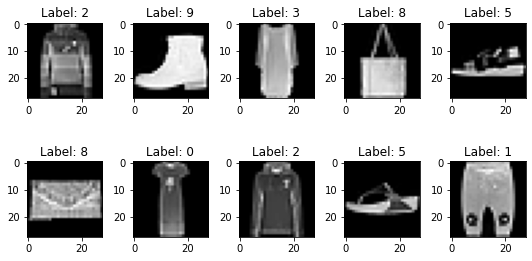

In [ ]:
def plot_samples():
    a, _, _ = get_fashion_mnist_dataloaders()
    num_row = 2
    num_col = 5# plot images
    num_images = num_row * num_col
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i, (x,y) in enumerate(a):
        if i >= num_images:
            break
        ax = axes[i//num_col, i%num_col]
        x = (x.numpy().squeeze() * 255).astype(int)
        y = y.numpy()[0]
        ax.imshow(x, cmap='gray')
        ax.set_title(f"Label: {y}")
      
    plt.tight_layout()
    plt.show()
plot_samples()

## Fonctions à compléter

In [ ]:
import numpy as np
def accuracy(y, y_pred) :
    card_D = y.shape[0] # provavelmente vou mudar isso pq eh softmax
 
    card_C = torch.sum(torch.argmax(y_pred, 1) == torch.argmax(y, 1))
    
    
    acc = card_C / card_D
    return acc, (card_C, card_D)

def accuracy_and_loss_whole_dataset(data_loader, model):
    cardinal = 0
    loss     = 0.
    n_accurate_preds  = 0.

    for x, y in data_loader:
        x, y = reshape_input(x, y)
        y_pred                = model.forward(x)
        xentrp                = cross_entropy(y, y_pred)
        _, (n_acc, n_samples) = accuracy(y, y_pred)
        cardinal = cardinal + n_samples
        loss     = loss + xentrp
        n_accurate_preds  = n_accurate_preds + n_acc

    loss = loss / float(cardinal)
    acc  = n_accurate_preds / float(cardinal)

    return acc, loss

def cross_entropy(y, y_pred):
    xentrp = y*torch.log(y_pred + 1e-8)
    loss = -torch.sum(xentrp)
    return loss

def sigmoid(x,):
    return 1 / (1 + torch.exp(-x))

def softmax(x, axis=-1):
    # assurez vous que la fonction est numeriquement stable
    # e.g. softmax(np.array([1000, 10000, 100000], ndim=2))
    max = torch.max(x, dim=1)
    max = max.values.unsqueeze(1)
    num = torch.exp(x - max)
    den = num.sum(axis=1).unsqueeze(1)
    return num / den
  
def inputs_tilde(x, axis=-1):
    # augments the inputs `x` with ones along `axis`
    ones = torch.ones(x.shape[0], 1)
    x_tilde = torch.hstack([x, ones])
    return x_tilde

In [ ]:
class LinearModel:
    def __init__(self, num_features, num_classes):
        self.params = torch.normal(0, 0.01, (num_features + 1, num_classes))
        self.t = 0 
        self.m_t = 0 # pour Adam: moyennes mobiles du gradient
        self.v_t = 0 # pour Adam: moyennes mobiles du carré du gradient
        
    def forward(self, x):
        inputs = inputs_tilde(x)
        outputs = inputs @ self.params
        outputs = softmax(outputs)
        return outputs

    def get_grads(self, y, y_pred, X): 
        # mini-batched gradient calculation
        X = inputs_tilde(X)
        X_transposed = X.transpose(0, 1)
        grads = X_transposed @ (y_pred - y)
        return grads

    def sgd_update(self, lr, grads):
        self.params = self.params - lr*grads
        pass

    
    def adam_update(self, lr, grads):
        self.t += 1
        beta_1 = 0.9
        beta_2 = 0.999
        epsilon = 1e-8
        m_t_prev = self.m_t
        v_t_prev = self.v_t
        self.m_t = beta_1*m_t_prev + (1 - beta_1)*grads
        self.v_t = beta_2*v_t_prev + (1-beta_2)*(grads**2)
        m_t_corrected = self.m_t/(1 - beta_1**self.t)
        v_t_corrected = self.v_t/(1 - beta_2**self.t)
        self.params = self.params - lr*m_t_corrected/(torch.sqrt(v_t_corrected) + epsilon)
        pass

def train(model, lr=0.1, nb_epochs=10, sgd=True, data_loader_train=None, data_loader_val=None):
    best_model = None
    best_val_accuracy = 0
    
    best_accuracy = 0
    logger = Logger()

    for epoch in range(nb_epochs+1):
        # at epoch 0 evaluate random initial model
        #   then for subsequent epochs, do optimize before evaluation.
        if epoch > 0:
            for x, y in data_loader_train:
                x, y = reshape_input(x, y)
                y_pred = model.forward(x)
                loss = cross_entropy(y, y_pred)
                grads = model.get_grads(y, y_pred, x)
                if sgd:
                    model.sgd_update(lr, grads)
                else:
                    model.adam_update(lr, grads)
        accuracy_train, loss_train = accuracy_and_loss_whole_dataset(data_loader_train, model)
        accuracy_val, loss_val = accuracy_and_loss_whole_dataset(data_loader_val, model)
        if accuracy_val > best_accuracy:
            best_val_accuracy = accuracy_val
            best_accuracy = accuracy_train
            best_model = model

          

        logger.log(accuracy_train, loss_train, accuracy_val, loss_val)
        if epoch % 5 == 0: # prints every 5 epochs, you can change it to % 1 for example to print each epoch
            print(f"Epoch {epoch:2d}, \
                    Train: loss={loss_train.item():.3e}, accuracy={accuracy_train.item()*100:.1f}%, \
                    Valid: loss={loss_val.item():.3e}, accuracy={accuracy_val.item()*100:.1f}%", flush=True)

    return best_model, best_val_accuracy, logger


## Évaluation

### SGD: Recherche d'hyperparamètres

In [ ]:
# SGD
# Montrez les résultats pour différents taux d'apprentissage, e.g. 0.1, 0.01, 0.001, et différentes tailles de mini-batch, e.g. 1, 20, 200, 1000.
batch_size_list = [20, 200, 500,1000]   # Define ranges in a list
lr_list = [0.1, 0.01, 0.001]           # Define ranges in a list

with torch.no_grad():
  for lr in lr_list:
    for batch_size in batch_size_list:
      print("------------------------------------------------------------------")
      print("Training model with a learning rate of {0} and a batch size of {1}".format(lr, batch_size))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)
      
      model = LinearModel(num_features=784, num_classes=10)
      _, val_accuracy, _ = train(model,lr=lr, nb_epochs=15, sgd=True, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a learning rate of 0.1 and a batch size of 20
Epoch  0,                     Train: loss=2.314e+00, accuracy=14.2%,                     Valid: loss=2.313e+00, accuracy=14.5%
Epoch  5,                     Train: loss=3.756e+00, accuracy=74.0%,                     Valid: loss=4.032e+00, accuracy=72.3%
Epoch 10,                     Train: loss=2.666e+00, accuracy=80.8%,                     Valid: loss=3.047e+00, accuracy=78.4%
Epoch 15,                     Train: loss=2.059e+00, accuracy=84.2%,                     Valid: loss=2.513e+00, accuracy=81.7%
validation accuracy = 81.500
------------------------------------------------------------------
Training model with a learning rate of 0.1 and a batch size of 200
Epoch  0,                     Train: loss=2.293e+00, accuracy=7.3%,                     Valid: loss=2.292e+00, accuracy=6.6%
Epoch  5,                     Train: loss=3.503e+00, accuracy=78.8%,   

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux valeurs du taux d'apprentisage et les colonnes correspondent au valeur du batch size. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

learning rate\batch_size  | 20 | 200 | 500 |1000 
-------------------|------------------|------------------|------------------|------------------|
**0.1**     | 81.5 | 84.8 | 83.6 | 79.3 |
**0.01**    | 85.1 | 85.0 | 85.0 | 82.0 | 
**0.001**   | 85.4 | 84.7 | **85.7** | 83.6 |

### SGD: Analyse du meilleur modèle

Epoch  0,                     Train: loss=2.311e+00, accuracy=3.8%,                     Valid: loss=2.311e+00, accuracy=3.5%
Epoch  5,                     Train: loss=1.118e+00, accuracy=81.1%,                     Valid: loss=1.107e+00, accuracy=81.1%
Epoch 10,                     Train: loss=1.609e+00, accuracy=79.7%,                     Valid: loss=1.599e+00, accuracy=79.5%
Epoch 15,                     Train: loss=7.418e-01, accuracy=78.5%,                     Valid: loss=7.394e-01, accuracy=78.6%
Epoch 20,                     Train: loss=5.089e-01, accuracy=85.2%,                     Valid: loss=5.227e-01, accuracy=84.9%
Epoch 25,                     Train: loss=6.890e-01, accuracy=81.3%,                     Valid: loss=7.142e-01, accuracy=80.5%
Epoch 30,                     Train: loss=5.219e-01, accuracy=84.3%,                     Valid: loss=5.400e-01, accuracy=83.6%
Epoch 35,                     Train: loss=8.279e-01, accuracy=81.2%,                     Valid: loss=8.458e-01, a

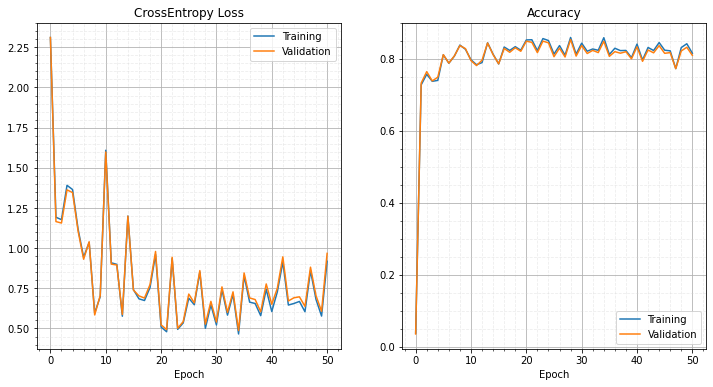

In [ ]:
# SGD
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
batch_size = 500 # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.001         # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  model = LinearModel(num_features=784, num_classes=10)
  best_model, best_val_accuracy, logger = train(model,lr=lr, nb_epochs=50, sgd=True, 
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

### Adam: Recherche d'hyperparamètres

Implémentez Adam, répétez les deux étapes précédentes (recherche d'hyperparamètres et analyse du meilleur modèle) cette fois en utilisat Adam, et comparez les performances finales avec votre meilleur modèle SGD.

In [ ]:
# ADAM
# Montrez les résultats pour différents taux d'apprentissage, e.g. 0.1, 0.01, 0.001, et différentes tailles de mini-batch, e.g. 1, 20, 200, 1000.
batch_size_list = [20, 200, 500, 1000, ]   # Define ranges in a list
lr_list = [0.1, 0.01, 0.001]           # Define ranges in a list


with torch.no_grad():
  for lr in lr_list:
    for batch_size in batch_size_list:
      print("------------------------------------------------------------------")
      print("Training model with a learning rate of {0} and a batch size of {1}".format(lr, batch_size))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)
      
      model = LinearModel(num_features=784, num_classes=10)
      _, val_accuracy, _ = train(model,lr=lr, nb_epochs=15, sgd=False, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a learning rate of 0.1 and a batch size of 20
Epoch  0,                     Train: loss=2.322e+00, accuracy=5.8%,                     Valid: loss=2.323e+00, accuracy=5.7%
Epoch  5,                     Train: loss=2.281e+00, accuracy=81.8%,                     Valid: loss=2.575e+00, accuracy=80.2%
Epoch 10,                     Train: loss=2.489e+00, accuracy=80.8%,                     Valid: loss=2.847e+00, accuracy=78.9%
Epoch 15,                     Train: loss=2.652e+00, accuracy=81.2%,                     Valid: loss=3.012e+00, accuracy=79.0%
validation accuracy = 83.600
------------------------------------------------------------------
Training model with a learning rate of 0.1 and a batch size of 200
Epoch  0,                     Train: loss=2.320e+00, accuracy=4.6%,                     Valid: loss=2.319e+00, accuracy=4.7%
Epoch  5,                     Train: loss=9.630e-01, accuracy=82.1%,     

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux valeurs du taux d'apprentisage et les colonnes correspondent au valeur du batch size. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

learning rate\batch_size  | 20 | 200 | 500 |1000 
-------------------|------------------|------------------|------------------|------------------|
**0.1**     | 83.6 | 82.8 | 84.4 | 84.8 |
**0.01**    | 82.6 | 85.4 | 84.8 | 85.5 |
**0.001**   | 85.7 | **86.3** | 85.7 | 84.7 |

### Adam: Analyse du meilleur modèle

Epoch  0,                     Train: loss=2.338e+00, accuracy=2.7%,                     Valid: loss=2.339e+00, accuracy=2.4%
Epoch  5,                     Train: loss=4.513e-01, accuracy=84.7%,                     Valid: loss=4.498e-01, accuracy=84.9%
Epoch 10,                     Train: loss=4.108e-01, accuracy=85.9%,                     Valid: loss=4.137e-01, accuracy=86.1%
Epoch 15,                     Train: loss=3.973e-01, accuracy=86.3%,                     Valid: loss=4.074e-01, accuracy=86.3%
Epoch 20,                     Train: loss=3.916e-01, accuracy=86.5%,                     Valid: loss=4.085e-01, accuracy=85.8%
Epoch 25,                     Train: loss=3.831e-01, accuracy=86.7%,                     Valid: loss=3.995e-01, accuracy=85.9%
Epoch 30,                     Train: loss=3.746e-01, accuracy=87.0%,                     Valid: loss=4.022e-01, accuracy=86.2%
Epoch 35,                     Train: loss=3.728e-01, accuracy=87.0%,                     Valid: loss=4.035e-01, a

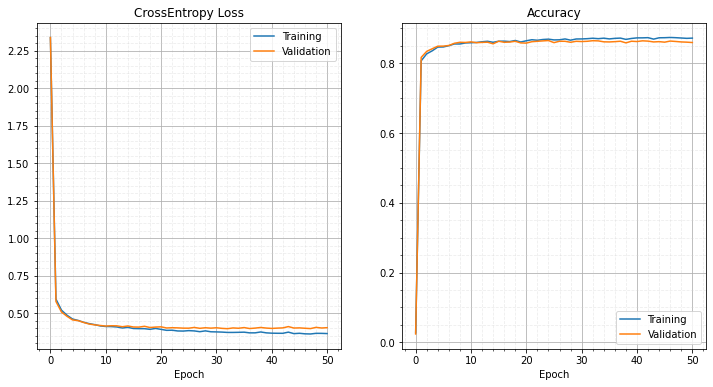

In [ ]:
# ADAM
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
batch_size = 200 # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.001         # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  model = LinearModel(num_features=784, num_classes=10)
  best_model, best_val_accuracy, logger = train(model,lr=lr, nb_epochs=50, sgd=False, 
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

### Analyse des Résultats

The problem consists in a multiclassification of pictures according to the cloth it represents. In this first part, we used logistic regression, a simple regressor that optimizes an objective function directly from the raw representation of pixels. Also, logistic regression is a convex optimization problem.

For this part, we had to implement logistic regression classifier with both stochastic gradient descent and Adam optimizers. The first optimizer consists of calculating the gradient of the current mini-batch and move the parameters to the opposite direction to minimize the objective function. Whereas Adam also performs a similar trick, but accelerates the process by estimating the first and second statistical moments of the gradient.

Since we had few hyperparameters to use, mini-batch size and learning rate, we performed a grid search experiment to discover the best combination of parameters. The batch sizes had the distribution of (20, 200, 500, 1000), while the learning rates had the distribution (0.1, 0.01, 0.001).

### SGD Results

For the SGD experiments, if we fix the batch size and compare the performances for different learning rates, we notice that higher values performed poorer that smaller ones. This performance enhancement happens because larger steps may cause the model to miss the global minimum by moving it around it without never reaching it. While smaller steps makes the model move smoothly to the minimum even if it's a slower convergence.

If we fix the learning rate and compare the results of the batch size, we notice that increasing it doesn't necesseraly make the model perform better. It enhances until a point and then makes the performance decrease. By the experiments performed, the optimal batch-size for this task lies between 200 and 500. Higher values made the model perform worse. In the experiments, we obtained the best results have the batch size of 500 and learning rate equals 0.001.

Another element to observe is the learning curve of the best model whose parameters were obtained in the grid search. The model has a wiggling beahviour in both training and validation curves. This also happens because of the stochastic behaviour present in the SGD optimization. If we increase the batch-size, we diminish this wiggling behaviour at the cost of slowing the training and the possibility of not converging.

The optimal hyperparameters for SGD were:

* Batch-size = 500
* learning rate = 0.001

### Adam Results

The Adam optimizer had a similar behaviour when using the same hyperparameters as in SGD. Although, there were some subtle differents. If we fix the batch size and diminish the learning rate, the performance resembles the behavour of SGD experiments. However, fixing the learning rate and increasing the batch size don't see the same behaviour as in SGD. Adam made the convergence more stable and less dependent to the batch size. Although, the performance could decrease if we used larger batch sizes.

The optimal value of the batch size obtained in the experiments were 200, while the best learning rate was also of 0.001.

Differently from the SGD, the training curve were much smoothier and converged faster. The Adam optimizer really made a difference on the final performance. For comparisson, the SGD best model had 79.8% of test accuracy, and the Adam best performance had 84.5% of test accuracy. Hence Adam is more suitable to build a classifier for this specific task with logistic regression.

# Partie 3 (20 points)

Pour cette partie, vous pouvez travailler en groupes de 2, mais il faut écrire sa propre dérivation et soumettre son propre rapport. Si vous travaillez avec un partenaire, il faut indiquer leur nom dans votre rapport.

### Problème

![picture](https://drive.google.com/uc?id=17_N7pIrf5pypQKiUh5cM7SX6raZUBcJC)

Considérons maintenant un réseau de neurones avec une couche d'entrée avec $D=784$ unités, $L$ couches cachées, chacune avec 300 unités et un vecteur de sortie $\mathbf{y}$ de dimension $K$. Vous avez $i = 1, .., N$ exemples dans un ensemble d'apprentissage, où chaque ${\bf x}_i \in \mathbb{R}^{784}$ est un vecteur de caractéristiques (features). $\mathbf{y}$ est un vecteur du type *one-hot* -- un vecteur de zéros avec un seul 1 pour indiquer que la classe $C=k$ dans la dimension $k$. Par exemple, le vecteur $\mathbf{y}=[0, 1, 0, \cdots, 0]^T$ représente la deuxième classe. La fonction de perte est donnée par
\begin{equation}
\mathcal{L} = -\sum_{i=1}^{N}\sum_{k=1}^{K}y_{k,i}\log (f_k( {\bf x}_i )  ) 
\end{equation}

La fonction d'activation de la couche finale a la forme  ${\bf f} = [f_1, ..., f_K]$ donné par la fonction d'activation softmax: 
\begin{equation}
f_k( {\bf a}^{(L+1)}({\bf x}_i) ) = \frac{\exp(a_k^{(L+1)})}{\sum_{c=1}^{K}\exp(a_c^{(L+1)})}, \;\;\;\;
\nonumber
\end{equation}

et les couches cachées utilisent une fonction d'activation de type ReLU:
\begin{equation}
  {\bf h}^{(l)}({\bf a}^{(l)}({\bf x}_i)) = \text{ReLU}({\bf a}^{(l)}({\bf x}_i) = \max\Big(0, \, \, {\bf a}^{(l)}({\bf x}_i)\Big)
\end{equation}

où ${\bf a}^{(l)}$ est le vecteur résultant du calcul de la préactivation habituelle ${\bf a}^{(l)}={\bf W}^{(l)}{\bf h}^{(l-1)} + {\bf b}^{(l)}$, qui pourrait être simplifiée à ${\boldsymbol \theta}^{(l)}\tilde{\bf h}^{(l-1)}$ en utilisant l'astuce de définir $\tilde{\bf h}$ comme ${\bf h}$ avec un 1 concaténé à la fin du vecteur.



### Questions

* a) (10 points) Donnez le pseudocode incluant des *calculs matriciels—vectoriels* détaillés pour l'algorithme de rétropropagation pour calculer le gradient pour les paramètres de chaque couche **étant donné un exemple d'entraînement**.

* b) (10 points) 
Implémentez l'optimisation basée sur le gradient de ce réseau en Pytorch.
Utilisez le code squelette ci-dessous comme point de départ et implémentez les mathématiques de l'algorithme de rétropropagation que vous avez décrit à la question précédente.Utilisez encore l'ensemble de données de Fashion MNIST (voir Partie 2). **Comparez différents modèles ayant différentes largeurs (nombre d'unités) et profondeurs (nombre de couches)**. Ici encore, n'utilisez l'ensemble de test que pour votre expérience finale lorsque vous pensez avoir obtenu votre meilleur modèle.

**IMPORTANT**

L'objectif du TP est de vous faire implémenter la rétropropagation à la main. **Il est donc interdit d'utiliser les capacités de construction de modèles ou de différentiation automatique de pytorch -- par exemple, aucun appels à torch.nn, torch.autograd ou à la méthode .backward().** L'objectif est d'implémenter un modèle de classification logistique ainsi que son entainement en utilisant uniquement des opérations matricielles de base fournies par PyTorch e.g. torch.sum(), torch.matmul(), etc.

## Votre pseudocode:

#### Algorithme de rétropopagation dans un réseau de neurones pour un exemple $\tilde{x}_i$:


1. Apply input vector X to the network and make the feedforward propagation while storing the pre-activation ($a_j$) and activated ($z_j=h(a_j)$) values of all layers and hidden units. 

2. Compute $δ_k$ for the output layer by computing the difference between real and expected outputs. 

3. Compute $\delta_j$ for all hidden layers $j$: $\delta_j = h'(a_j)\sum_{k}w_{kj}\delta_{k}$, with $j$ as the current hidden layer, $k$ the next layer, and $i$ the last layer.


4. Compute the gradients of all the hidden layers: $\frac{\partial E}{\partial w_{ji}}=\delta_j z_i$.

## Fonctions à compléter

In [ ]:
from copy import deepcopy

''' Les fonctions dans cette cellule peuvent avoir les mêmes déclarations que celles de la partie 2''' 
def accuracy(y, y_pred) :
    card_D = y.shape[0] # provavelmente vou mudar isso pq eh softmax
    card_C = torch.sum(torch.argmax(y_pred, 1) == torch.argmax(y, 1))
    acc = card_C / card_D
    return acc, (card_C, card_D)

def accuracy_and_loss_whole_dataset(data_loader, model):
    cardinal = 0
    loss = 0.0
    n_accurate_preds = 0.0

    for x, y in data_loader:
        x, y = reshape_input(x, y)
        y_pred                = model.forward(x)
        xentrp                = cross_entropy(y, y_pred)
        _, (n_acc, n_samples) = accuracy(y, y_pred)
        cardinal = cardinal + n_samples
        loss     = loss + float(xentrp)
        n_accurate_preds  = n_accurate_preds + n_acc
    loss = loss / float(cardinal)
    acc  = n_accurate_preds / float(cardinal)

    return acc, loss


def inputs_tilde(x, axis=-1):
    # augments the inputs `x` with ones along `axis`
    ones = torch.ones(x.shape[0], 1)
    x_tilde = torch.hstack([x, ones])
    return x_tilde

def softmax(x, axis=-1):
    # assurez vous que la fonction est numeriquement stable
    # e.g. softmax(np.array([1000, 10000, 100000], ndim=2))
    max = torch.max(x, dim=1).values.unsqueeze(1)
    num = torch.exp(x - max)
    den = num.sum(axis=1).unsqueeze(1)
    return num / den

def cross_entropy(y, y_pred):
    xentrp = y*torch.log(y_pred + 1e-8)
    loss = -torch.sum(xentrp)
    return loss

def softmax_cross_entropy_backward(y, y_pred):
    return (y_pred - y)

def relu_forward(x):
    x[x < 0] = 0
    return x


def relu_backward(d_x, x):
    d_x[x <= 0] = 0
    return d_x
    
    
# Model est une classe representant votre reseaux de neuronnes
class MLPModel:
    def __init__(self, n_features=784, n_hidden_features=50, n_hidden_layers=4, 
                 n_classes=10, random_state=42):
        self.n_features        = n_features
        self.n_hidden_features = n_hidden_features
        self.n_hidden_layers   = n_hidden_layers
        self.n_classes         = n_classes
        torch.manual_seed(random_state) # reproducibility constant
        self.parameters = [torch.normal(0, 0.001, (n_features, n_hidden_features))] \
                      + [torch.normal(0, 0.001, (n_hidden_features, n_hidden_features)) for _ in range(n_hidden_layers-1)] \
                      + [torch.normal(0, 0.001, (n_hidden_features, n_classes))]
        self.bias   = [torch.normal(0, 0.001, (1, n_hidden_features))] \
                      + [torch.normal(0, 0.001, (1, n_hidden_features)) for _ in range(n_hidden_layers - 1)] \
                      + [torch.normal(0, 0.001, (1, n_classes))]
        print(f"Teta params={[p.shape for p in self.parameters]}")
        print(f"Teta params={[p.shape for p in self.bias]}")
        print(f"length of parameters: {len(self.parameters)}")

        self.z = [0 for _ in range(len(self.parameters))] # liste contenant le resultat des multiplications matricielles
        self.a = [0 for _ in range(len(self.parameters))] # liste contenant le resultat des fonctions d'activations
                
        self.t        = 0
        self.m_t      = [0 for _ in range(len(self.parameters))] # pour Adam: moyennes mobiles du gradient
        self.m_t_bias = [0 for _ in range(len(self.bias))]
        self.v_t      = [0 for _ in range(len(self.parameters))] # pour Adam: moyennes mobiles du carré du gradient
        self.v_t_bias = [0 for _ in range(len(self.bias))]

    def forward(self, x):
        z_l = (x @ self.parameters[0]) + self.bias[0]       
        a_l = relu_forward(z_l)
        self.z[0] = z_l
        self.a[0] = a_l
        for i in range(1, self.n_hidden_layers, 1):
            z_l = (a_l @ self.parameters[i]) + self.bias[i]
            a_l = relu_forward(z_l)
            self.z[i] = z_l
            self.a[i] = a_l
        z_l = (a_l @ self.parameters[-1]) + self.bias[-1]
        a_l = softmax(z_l)
        self.z[-1] = z_l
        self.a[-1] = a_l
        outputs = a_l
        return outputs

    def backward(self, y, y_pred, x):
        weight_length = len(self.parameters)
        batch_length = y_pred.shape[0]
        gradients_weights = list()
        gradients_bias    = list()
        for i in range(weight_length-1, 0, -1):
            if i == (weight_length-1):
                delta_i = (y_pred - y)
                grad = (self.a[i-1].transpose(0, 1) @ delta_i) / batch_length
                bias_grad = delta_i.mean(0)
                gradients_weights.append(grad)
                gradients_bias.append(bias_grad)
            else:
                delta_weight = (delta_i.to(torch.float32) @ self.parameters[i+1].transpose(0, 1).to(torch.float32))
                delta_i      = relu_backward(delta_weight, self.z[i])
                grad         = (self.a[i-1].transpose(0, 1) @ delta_i) / batch_length
                bias_grad = delta_i.mean(0)
                gradients_bias.append(bias_grad)
                gradients_weights.append(grad)
                pass
        delta_weight = (delta_i.to(torch.float32) @ self.parameters[1].transpose(0, 1).to(torch.float32))
        delta_i      = relu_backward(delta_weight, self.z[0])
        
        # Weight Gradients
        grad         = (x.transpose(0, 1) @ delta_i) / batch_length
        gradients_weights.append(grad)
        
        # Bias Gradients
        bias_grad = delta_i.mean(0)
        gradients_bias.append(bias_grad)
        
        gradients_weights = list(reversed(gradients_weights))
        gradients_bias = list(reversed(gradients_bias))

        return gradients_weights, gradients_bias

    def sgd_update(self, lr, grads, grads_bias):
        len_weights = len(self.parameters)

        for i in range(len_weights):
            self.parameters[i] = self.parameters[i] - (lr * grads[i])
            self.bias[i] = self.bias[i] - (lr * grads_bias[i])
        
    
    def adam_update(self, lr, grads, grads_bias):
        self.t += 1
        
        len_weights = len(self.parameters)
        beta_1 = 0.9
        beta_2 = 0.999
        epsilon = 1e-8
        m_t_prev      = deepcopy(self.m_t)
        m_t_bias_prev = deepcopy(self.m_t_bias)
        v_t_prev      = deepcopy(self.v_t)
        v_t_bias_prev = deepcopy(self.v_t_bias)


        for i in range(len_weights):
            self.m_t[i] = beta_1*m_t_prev[i] + (1 - beta_1)*grads[i]
            self.m_t_bias[i] = beta_1*m_t_bias_prev[i] + (1 - beta_1)*grads_bias[i]

            self.v_t[i] = beta_2*v_t_prev[i] + (1-beta_2)*(grads[i]**2)
            self.v_t_bias[i] = beta_2*v_t_bias_prev[i] + (1-beta_2)*(grads_bias[i]**2)

            m_t_corrected = self.m_t[i] / (1-(beta_1**self.t))
            m_t_bias_corrected = self.m_t_bias[i]/(1 - (beta_1**self.t))
            v_t_corrected = torch.abs(self.v_t[i]/(1 - (beta_2**self.t)))
            v_t_bias_corrected = torch.abs(self.v_t_bias[i]/(1 - (beta_2**self.t)))

            self.parameters[i] = self.parameters[i] - lr * (m_t_corrected/(torch.sqrt(v_t_corrected) + epsilon))
            self.bias[i] = self.bias[i] - lr * (m_t_bias_corrected/(torch.sqrt(v_t_bias_corrected) + epsilon))
        
                    

def train(model, lr=0.1, nb_epochs=10, sgd=True, data_loader_train=None, data_loader_val=None):
    best_model = None
    best_val_accuracy = 0
    logger = Logger()

    for epoch in range(nb_epochs+1):

        # at epoch 0 evaluate random initial model
        #   then for subsequent epochs, do optimize before evaluation.
        if epoch > 0:
            for x, y in data_loader_train:
                x, y = reshape_input(x, y)

                y_pred = model.forward(x)
                grads_, grads_bias_  = model.backward(y, y_pred, x)
                
                if sgd:
                    model.sgd_update(lr, grads_, grads_bias_)
                else:
                    model.adam_update(lr, grads_, grads_bias_)
        
        accuracy_train, loss_train = accuracy_and_loss_whole_dataset(data_loader_train, model)
        accuracy_val, loss_val = accuracy_and_loss_whole_dataset(data_loader_val, model)
        if accuracy_val > best_val_accuracy:
            best_val_accuracy = accuracy_val
            best_accuracy = accuracy_train
            best_model = model

        logger.log(accuracy_train, loss_train, accuracy_val, loss_val)
        if epoch % 5 == 0: # prints every 5 epochs, you can change it to % 1 for example to print each epoch
            print(f"Epoch {epoch:2d}, \
                    Train:loss={loss_train:.3f}, accuracy={accuracy_train.item()*100:.1f}%, \
                    Valid: loss={loss_val:.3f}, accuracy={accuracy_val.item()*100:.1f}%", flush=True)

    return best_model, best_val_accuracy, logger




## Évaluation

### SGD: Recherche d'hyperparamètres

In [ ]:
# SGD
# Montrez les résultats pour différents nombre de couche, e.g. 1, 3, 5, et différent nombres de neurone, e.g. 25, 100, 300, 500, 1000.
depth_list = [1, 3, 5, 7]   # Define ranges in a list
width_list = [25, 100, 300, 500, 1000]   # Define ranges in a list
lr = 0.01           # Some value
batch_size = 500   # Some value

with torch.no_grad():
  for depth in depth_list:
    for width in width_list:
      print("------------------------------------------------------------------")
      print("Training model with a depth of {0} layers and a width of {1} units".format(depth, width))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)
      
      MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
      _, val_accuracy, _ = train(MLP_model,lr=lr, nb_epochs=40, sgd=True, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 25 units
Teta params=[torch.Size([784, 25]), torch.Size([25, 10])]
Teta params=[torch.Size([1, 25]), torch.Size([1, 10])]
length of parameters: 2
Epoch  0,                     Train:loss=2.303, accuracy=10.1%,                     Valid: loss=2.303, accuracy=9.4%
Epoch  5,                     Train:loss=2.068, accuracy=18.2%,                     Valid: loss=2.071, accuracy=18.6%
Epoch 10,                     Train:loss=1.268, accuracy=54.0%,                     Valid: loss=1.266, accuracy=53.7%
Epoch 15,                     Train:loss=0.960, accuracy=65.0%,                     Valid: loss=0.958, accuracy=64.5%
Epoch 20,                     Train:loss=0.818, accuracy=69.2%,                     Valid: loss=0.813, accuracy=69.4%
Epoch 25,                     Train:loss=0.744, accuracy=72.9%,                     Valid: loss=0.737, accuracy=73.3%
Epoch 30,                

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux nombre de couche et les colonnes correspondent au nombre de neurone dans chaque couche. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

depth\width  | 25 | 100 | 300 | 500 | 1000 
-------------------|------------------|------------------|------------------|------------------|------------------|
**1**   | 78.1 | 77.9 | **80.2** | 78.9 | 79.7 |
**3**   | 10.2 | 9.8 | 9.4 | 10.2 | 9.9 |
**5**   | 10.1 | 9.8 | 10.6  | 9.5 | 10.0 |
**7**   | 10.8 | 10.1 | 10.6 | 10.0 | 10.4 |

### SGD: Analyse du meilleur modèle

Teta params=[torch.Size([784, 300]), torch.Size([300, 10])]
Teta params=[torch.Size([1, 300]), torch.Size([1, 10])]
length of parameters: 2
Epoch  0,                     Train:loss=2.303, accuracy=10.0%,                     Valid: loss=2.303, accuracy=10.0%
Epoch  5,                     Train:loss=1.738, accuracy=39.1%,                     Valid: loss=1.734, accuracy=39.9%
Epoch 10,                     Train:loss=1.084, accuracy=61.2%,                     Valid: loss=1.082, accuracy=61.1%
Epoch 15,                     Train:loss=0.861, accuracy=67.4%,                     Valid: loss=0.857, accuracy=67.9%
Epoch 20,                     Train:loss=0.765, accuracy=71.7%,                     Valid: loss=0.762, accuracy=71.3%
Epoch 25,                     Train:loss=0.705, accuracy=74.5%,                     Valid: loss=0.705, accuracy=74.1%
Epoch 30,                     Train:loss=0.661, accuracy=76.4%,                     Valid: loss=0.661, accuracy=76.2%
Epoch 35,                     Trai

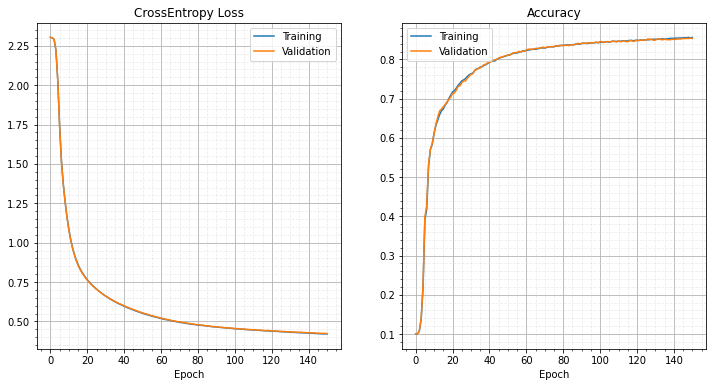

In [ ]:
# SGD
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
depth = 1    # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
width = 300    # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.01           # Some value
batch_size = 500   # Some value

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
  best_model, best_val_accuracy, logger = train(MLP_model,lr=lr, nb_epochs=150, sgd=True, 
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

### Adam: Recherche d'hyperparamètres

Implémentez Adam, répétez les deux étapes précédentes (recherche d'hyperparamètres et analyse du meilleur modèle) cette fois en utilisat Adam, et comparez les performances finales avec votre meilleur modèle SGD.

In [ ]:
# ADAM
# Montrez les résultats pour différents nombre de couche, e.g. 1, 3, 5, et différent nombres de neurone, e.g. 25, 100, 300, 500, 1000.
depth_list = [1, 3, 5, 7]   # Define ranges in a list
width_list = [25, 100, 300, 500, 1000]   # Define ranges in a list
lr = 0.001           # Some value
batch_size = 200   # Some value

with torch.no_grad():
  for depth in depth_list:
    for width in width_list:
      print("------------------------------------------------------------------")
      print("Training model with a depth of {0} layers and a width of {1} units".format(depth, width))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)
      
      MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
      _, val_accuracy, _ = train(MLP_model, lr=lr, nb_epochs=25, sgd=False, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 25 units
Teta params=[torch.Size([784, 25]), torch.Size([25, 10])]
Teta params=[torch.Size([1, 25]), torch.Size([1, 10])]
length of parameters: 2
Epoch  0,                     Train:loss=2.303, accuracy=10.0%,                     Valid: loss=2.303, accuracy=10.1%
Epoch  5,                     Train:loss=0.432, accuracy=85.0%,                     Valid: loss=0.443, accuracy=84.8%
Epoch 10,                     Train:loss=0.390, accuracy=86.4%,                     Valid: loss=0.416, accuracy=85.5%
Epoch 15,                     Train:loss=0.374, accuracy=86.6%,                     Valid: loss=0.405, accuracy=86.1%
Epoch 20,                     Train:loss=0.345, accuracy=87.8%,                     Valid: loss=0.388, accuracy=86.6%
Epoch 25,                     Train:loss=0.328, accuracy=88.4%,                     Valid: loss=0.379, accuracy=86.6%
validation accuracy = 86

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux nombre de couche et les colonnes correspondent au nombre de neurone dans chaque couche. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

depth\width  | 25 | 100 | 300 | 500 | 1000 
-------------------|------------------|------------------|------------------|------------------|------------------|
**1**   | 86.7 | 88.6 | 90.1 | 90.2 | **90.4** |
**3** | 83.5 | 87.6 | 89.8  | 89.0 | 89.8  |
**5**  | 10.1 | 10.0 | 10.5 | 10.2 | 89.6 |
**7**  | 10.4 | 10.2 | 10.2 | 10.1 | 9.9 |

### Adam: Analyse du meilleur modèle

Teta params=[torch.Size([784, 1000]), torch.Size([1000, 10])]
Teta params=[torch.Size([1, 1000]), torch.Size([1, 10])]
length of parameters: 2
Epoch  0,                     Train:loss=2.303, accuracy=10.1%,                     Valid: loss=2.303, accuracy=9.2%
Epoch  5,                     Train:loss=0.332, accuracy=88.1%,                     Valid: loss=0.344, accuracy=87.4%
Epoch 10,                     Train:loss=0.263, accuracy=90.6%,                     Valid: loss=0.301, accuracy=89.2%
Epoch 15,                     Train:loss=0.224, accuracy=91.9%,                     Valid: loss=0.287, accuracy=89.5%
Epoch 20,                     Train:loss=0.224, accuracy=91.6%,                     Valid: loss=0.325, accuracy=88.2%
Epoch 25,                     Train:loss=0.164, accuracy=94.1%,                     Valid: loss=0.283, accuracy=90.0%
Epoch 30,                     Train:loss=0.148, accuracy=94.7%,                     Valid: loss=0.298, accuracy=89.8%
Epoch 35,                     Tr

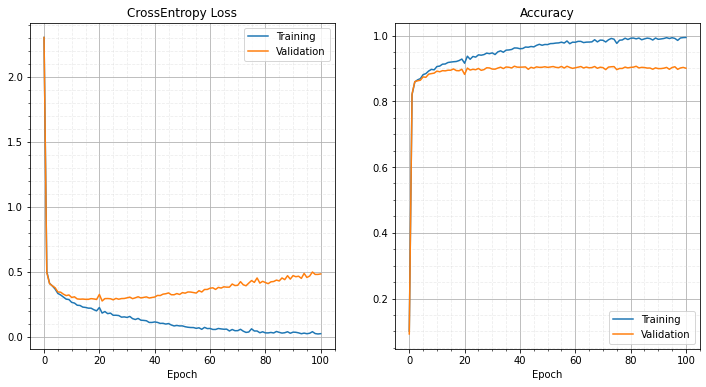

In [ ]:
# ADAM
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
depth = 1    # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
width = 1000    # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.0005           # Some value
batch_size = 200   # Some value

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
  best_model, best_val_accuracy, logger = train(MLP_model,lr=lr, nb_epochs=100, sgd=False, 
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

### Analyse des Résultats

Multilayer perceptron networks have a slight advantage over logistic regression models, according to the experiments done in this notebook. The key feature of this network is representation learning, which can break down inputs into projections that better separate data. Hence, the best performance on the test data for MLP was better than for logistic regression for either of the optimization algorithms.

### SGD Results

First, we performed a hyperparameter search for SGD with a network depth distribution of [1, 3, 5, 7] and a hidden layer's width distribution of [25, 100, 300, 500, 1000]. Having these results, we noticed that the model could converge only for a depth of 1. The other experiments did not converge at all because of the SGD algorithm.

In MLP training, we first compute the gradients over all the layers before changing the weight parameters. The problem is that the gradients approximate zero as we backpropagate the error to the input layers. Therefore, the parameters close to the input layers barely change with the training if we utilize more than one hidden layer. And the model would have a lot of difficulties converging because most of the parameters remain unchanged.

A possible approach to overcome this issue before using Adam would be to use momentum to speed up the training. The momentum approach uses the previous time-step gradient computation multiplied by a constant (usually 0.9) to sum with the current gradient.

According to the grid search experiments, the network with the best performance on the test set would have one hidden layer with 300 units. With the validation set, these hyperparameters had 80.2% of accuracy. For the test set, they had an accuracy of 83.6% with a margin to improve yet. This room for improvement comes from the slow converging capabilities of raw SGD, and it would require a lot more time to obtain the same results we will see in the Adam experiments.

### Adam Results

As expressed in previous sections, Adam speeds up the training by a lot when compared to the raw SGD approach. The results confirm these observations by having a better performance for the set of hyperparameters grid with the same number of epochs to train.

We notice that by the experiments, the model could converge for both depths of 1 and 3. Since we not only move the parameters towards the negative direction of the gradient, we speed up the training by a lot, even with more hidden layers.

However, the model falls for the same convergence problems stated on the SGD when we increase the number of hidden layers: the first layers remain almost unchanged, and the model loses its capabilities to separate the data into the specified classes. Yet, the model can still converge to good results even in these cases, as we see in the experiment with depth=5 and width=1000, which had a performance of 89.6%. Even better than all the SGD experiments.

The best model had the hyperparameters depth=1 and width=1000, resulting in a validation performance of 90.4%. For the test set, it had 89.6% of accuracy.

Finally, the results obtained during this TP assert that Adam optimizers thrive over pure SGD optimization. This better performance comes from the fact that Adam computes estimates of the first and second moment of the gradients to change the parameters towards an optimal value. The Adam converged faster than SGD for both logistic regression and MLP models. But MLP performed better than logistic regression because the MLP hidden layers learns project the data to separate them in the best way possible.

